# 🦁🐯 Zoo animals classification 🦓🐼

In this notebook I'll examine a dataset of zoo animals and build a very simple Machine Learning classifier that is able to associate each animal to a class type. 

# 1. Data

I will be using a dataset provided by [Kaggle](https://www.kaggle.com/uciml/zoo-animal-classification). It is already well structured, as it is meant to be a beginner's dataset.  
The features that describe each animal are:

* `animal_name`: String
* `hair`: Boolean
* `feathers`: Boolean
* `eggs`: Boolean
* `milk`: Boolean
* `airborne`: Boolean
* `aquatic`: Boolean
* `predator`: Boolean
* `toothed`: Boolean
* `backbone`: Boolean
* `breathes`: Boolean
* `venomous`: Boolean
* `fins`: Boolean
* `legs`: Numeric (set of values: {0,2,4,5,6,8})
* `tail`: Boolean
* `domestic`: Boolean
* `catsize`: Boolean

The target feature is `class_type`, which is an integer in range `[1,7]`.  
The 7 class types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate


# 2. Evaluation

For this simple task, I think model's accuracy is more than well suited.  
I will also, just for curiosity, take into consideration:
* precision
* recall
* f1 score
* support

# 3. Feature exploration analysis

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

seed = 9871243

In [2]:
zoo = pd.read_csv("./data/zoo-data.csv")
class_ = pd.read_csv("./data/zoo-class.csv")

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


These characteristics of animal are, to me, a bit vague. I would be more interested to see how they correlate to each other in a more "visual" and direct way than having to guess some interesting relations.  
Let's do just that: plot a correlation matrix.

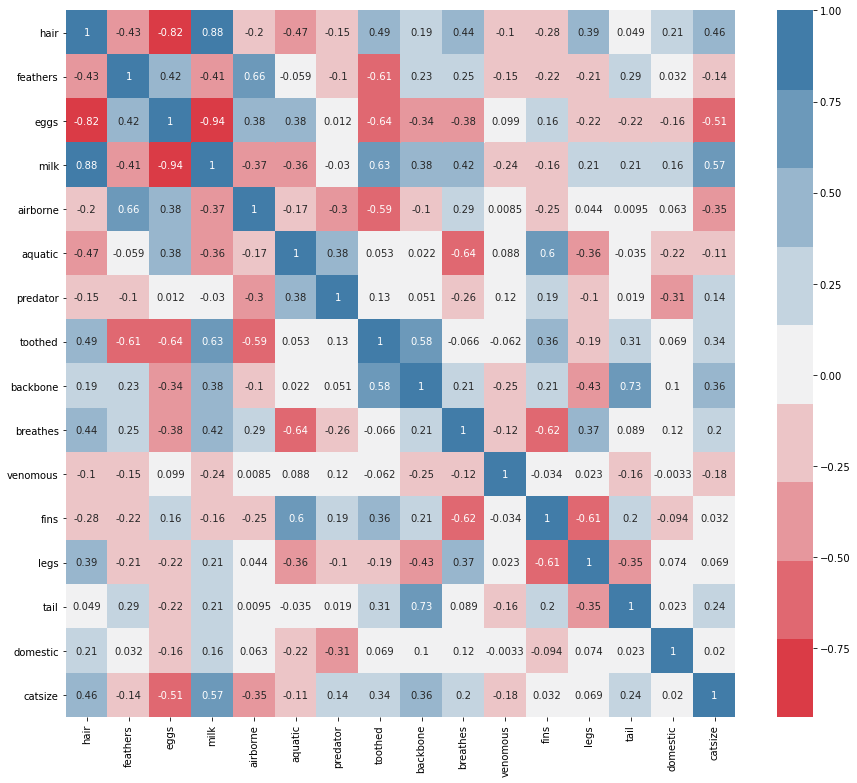

In [5]:
corr_mat = zoo.drop(["animal_name", "class_type"], axis=1).corr()

fig, ax = plt.subplots(figsize=(15,13))
cmap = sb.diverging_palette(10, 240, n=9)
ax = sb.heatmap(corr_mat, cmap=cmap, annot=True)

The relations I personally find worth noting are:
* `fins` and `aquatic`: there only is a `0.6` correlation, which isn't much (I asked myself: *aren't all finned animals aquatic?*)
* `eggs` and `milk`: the animals that lay eggs almost always never lactate, which reflects the `-0.94` relation
* `feathers` and `airborne`: only a `0.66` relation. Again, which animals have feathers but don't fly? (🐧)
* `milk` and `hair`: this one is actually interesting. Animals with hair almost always lactate.

I want to visualize the relation between each group of `fins` and `aquatic`.  
*What groups?* There are four:  
+ `fins: 0, aquatic: 0`
+ `fins: 0, aquatic: 1`
+ `fins: 1, aquatic: 0`
+ `fins: 1, aquatic: 1`

To visualize these relations, I'll use a pie chart.

In [91]:
cmbs = {}
sizes = []  # will be used for pie chart

for i in range(2):
    for j in range(2):
        hasfins = zoo['fins'] == i
        isaquatic = zoo['aquatic'] == j
        cmbs[f'{i},{j}'] = zoo.where(hasfins & isaquatic).dropna()
 
        size = len(cmbs[f'{i},{j}']) / len(zoo)
        sizes.append(size)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
1,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
3,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
4,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
5,buffalo,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0


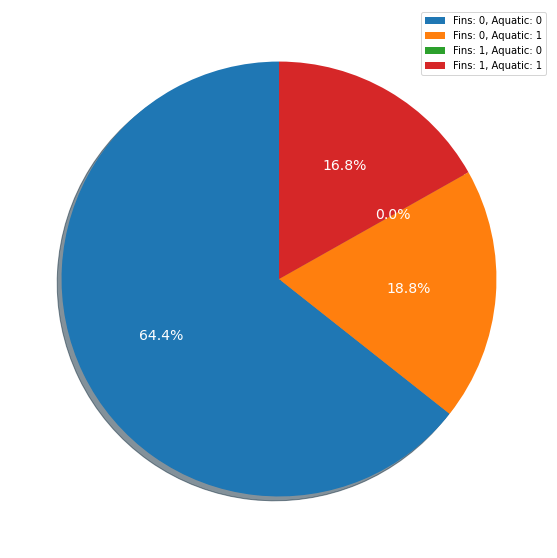

In [97]:
labels = ['Fins: 0, Aquatic: 0',
          'Fins: 0, Aquatic: 1',
          'Fins: 1, Aquatic: 0',
          'Fins: 1, Aquatic: 1']

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'color': 'white', 'fontsize': 14}
)
ax.legend(labels, loc='upper right');

Alright, my question has been solved and I was right: there are **no** animals with fins that **don't** live underwater.

# 4. Target encoding

In [6]:
class_

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


The `class_` dataframe, as it is now, cannot represent our target `y`.  
It would be cleaner and easier to have a dataframe such as:
```
+    name  +  class   +
----------------------
+ aardvark |     1    +
+ antelope |     1    +
```

We'll be building it ourselves. We have to extract the class number for each animal.

In [7]:
animals = list(zoo.animal_name)
animals[:5]

['aardvark', 'antelope', 'bass', 'bear', 'boar']

In [8]:
class_numbers = []
class_names = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

for animal in animals:
    for _, row in class_.iterrows():
        if animal in row['Animal_Names'].split(', '):
            class_numbers.append(row['Class_Number'])
            break

class_numbers[:5]

[1, 1, 4, 1, 1]

In [9]:
classifications = pd.DataFrame({
    'animal_name': animals,
    'class_number': class_numbers
})
classifications.head()

,animal_name,class_number
0,aardvark,1
1,antelope,1
2,bass,4
3,bear,1
4,boar,1


# 5. Modeling

Let's create `X` and `y`.  
For the purpose of X and y, the column `name` is meaningless. We'll then `drop()` it.

In [10]:
X = zoo.drop("animal_name", axis=1)
y = classifications.drop("animal_name", axis=1)

In [11]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
y.head()

,class_number
0,1
1,1
2,4
3,1
4,1


Now let's create two models (`LinearSVC` and `RandomForestClassifier`) and compare them to each other.  


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

svc = LinearSVC(random_state=seed)
rfc = RandomForestClassifier(random_state=seed)

svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

svc.score(X_test, y_test), rfc.score(X_test, y_test)

(1.0, 1.0)

Amazing results!  

Well... We're not completely sure. There is the risk that our models are overfitting.  
Let's try to cross-validate our training data.

In [15]:
from sklearn.model_selection import cross_val_score

print(f"Cross validated score for SVC: {np.mean(cross_val_score(svc, X, y, cv=10))}")
print(f"Cross validated score for RandomForest: {np.mean(cross_val_score(rfc, X, y, cv=10))}")

Cross validated score for SVC: 0.96
Cross validated score for RandomForest: 0.99


Okay, that's a slight relief.  
Let's print out Sklearn's `classification_report`

In [16]:
from sklearn.metrics import classification_report

svc_preds = svc.predict(X_test)
rfc_preds = rfc.predict(X_test)
y_true = y_test

print(classification_report(y_true, svc_preds, target_names=class_names))

              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         6
        Bird       1.00      1.00      1.00         6
     Reptile       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         2
   Amphibian       1.00      1.00      1.00         2
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [17]:
print(classification_report(y_true, rfc_preds, target_names=class_names))

              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         6
        Bird       1.00      1.00      1.00         6
     Reptile       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         2
   Amphibian       1.00      1.00      1.00         2
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Conclusions

This was an easy task for sure: the database wasn't very big, the classes very few and the data was already well done (no missing values, no outliers, no data to encode ecc.).  